### Import Modules

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib

### Import Libraries

In [2]:
# modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# hyperparameter
SEED_STATE=42
LEARNING_RATE=0.05
EPOCHS=1000

In [4]:
# read csv
data = pd.read_csv("California-Housing-Dataset.csv")               
print("Data loaded successfully.")
print("data shape:", data.shape )
print("data columns:", data.columns)
print("data length:", len(data))
print("data info:", data.info())
data.head()

Data loaded successfully.
data shape: (20640, 10)
data columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
data length: 20640
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: fl

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Preprocessing

### Convert object to integer in column objectproximity

In [5]:
def convert_ocean_proximity_to_integer(data):
    cols=data['ocean_proximity'].unique()
    mpp={category:idx for idx,category in enumerate(cols)}
    data['ocean_proximity']=data['ocean_proximity'].map(mpp)
    return data,mpp


### Drop null rows and duplicates row

In [6]:
# data Cleansing
def data_pp(data):
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)
    convert_ocean_proximity_to_integer(data)
data_pp(data)

In [7]:
# split into train and test
train = data.drop('median_house_value',axis=1)
test=data['median_house_value']

In [8]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0


In [9]:
test.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

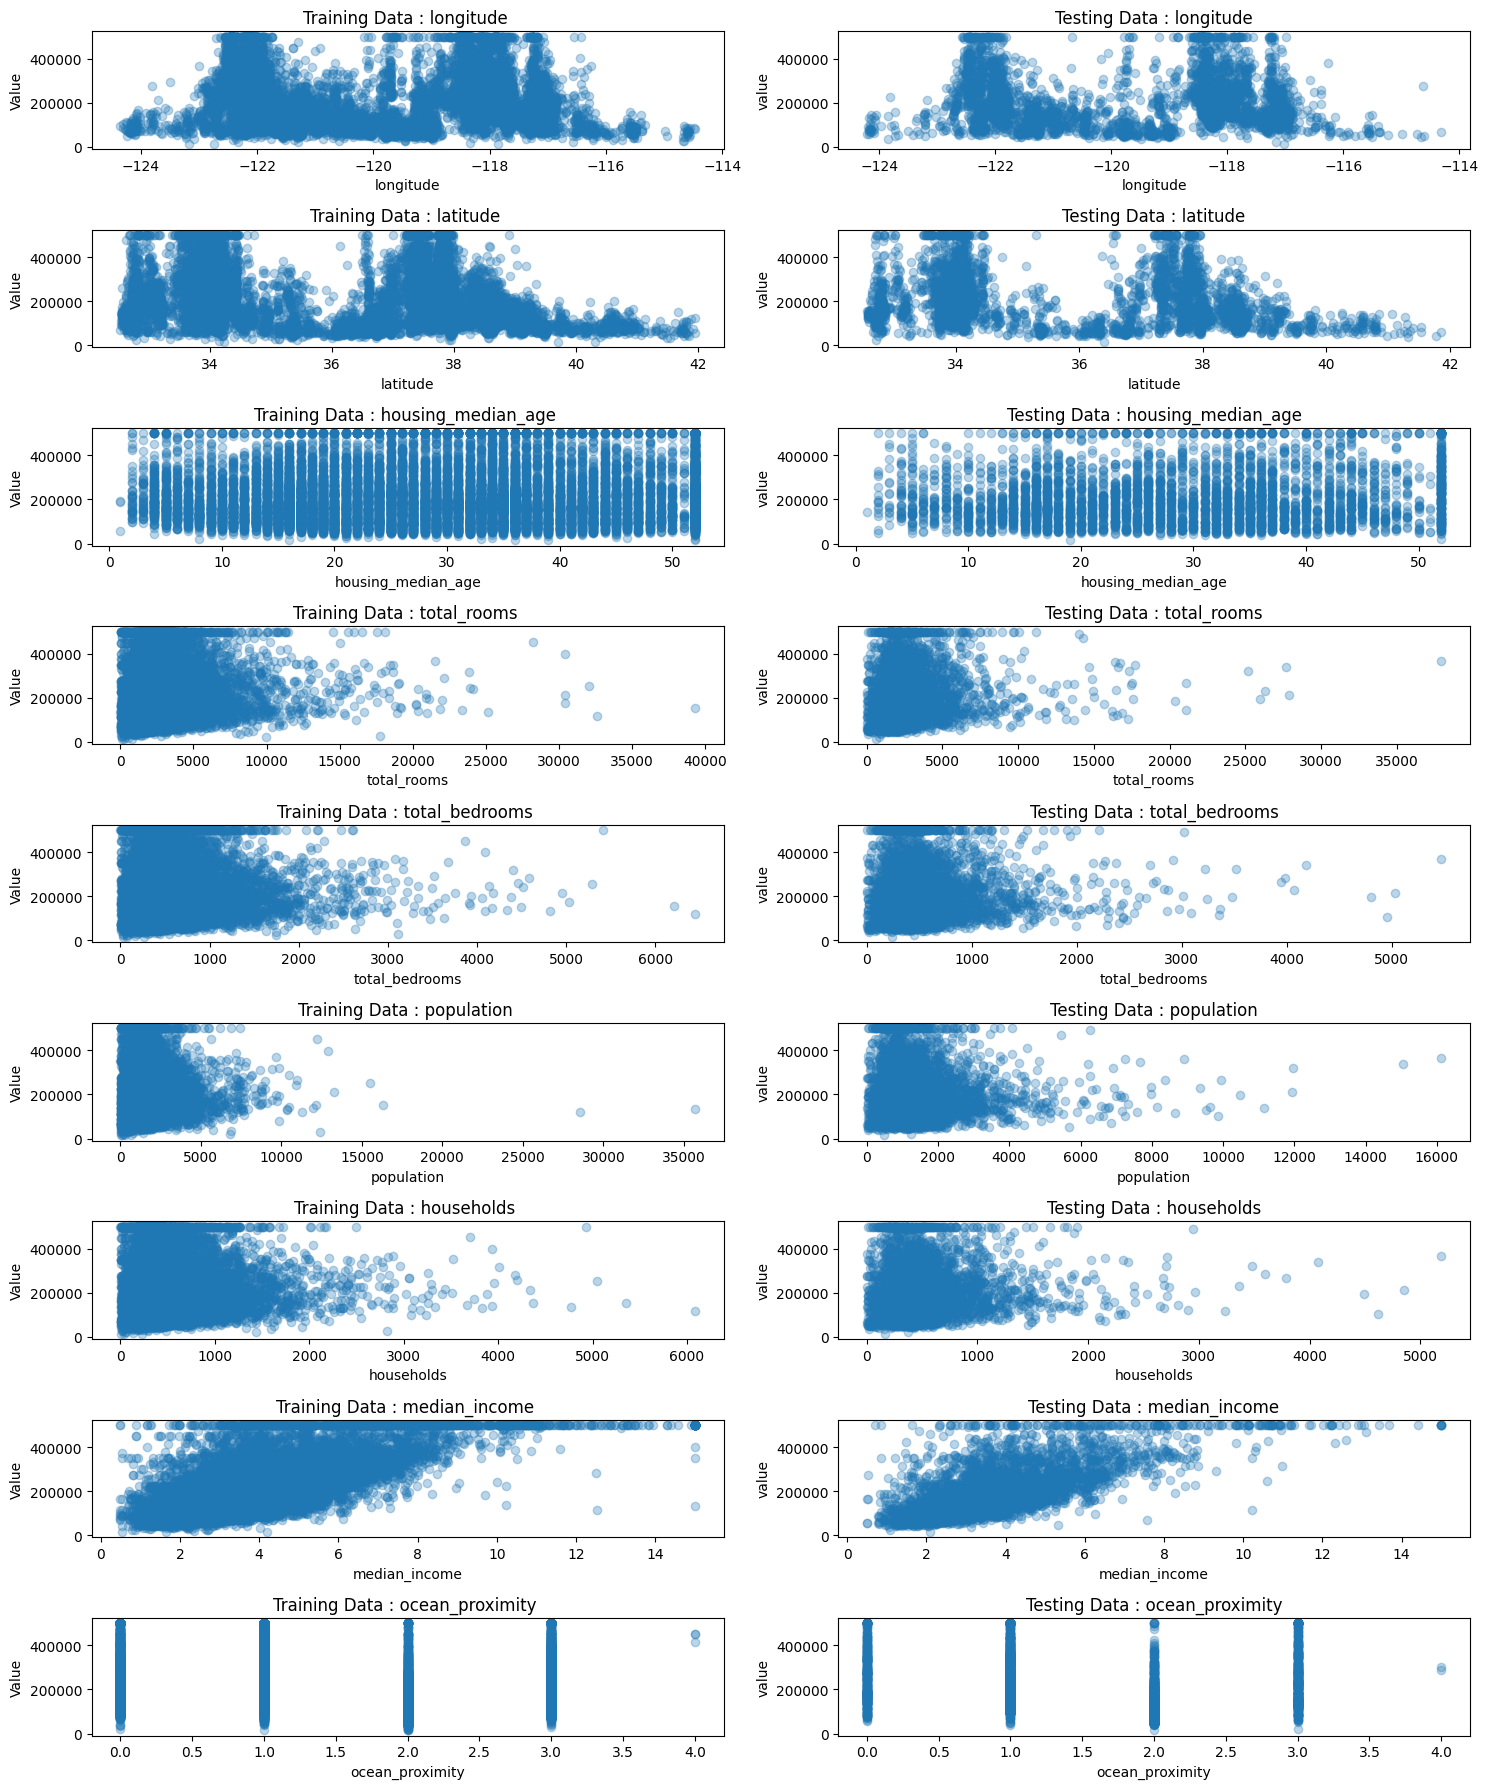

In [10]:
# plot data foe every label vs  y for both train and test
def plot_features(X_train,Y_train,X_test,Y_test):
    feature=X_train.shape[1]
    fig,axes=plt.subplots(feature,2,figsize=(15,2*feature))
    for i,feature in enumerate(X_train.columns):
        axes[i,0].scatter(X_train[feature],Y_train,alpha=0.3)
        axes[i,0].set_title(f"Training Data : {feature} ")
        axes[i,0].set_xlabel(feature)
        axes[i,0].set_ylabel("Value")        

        axes[i,1].scatter(X_test[feature],Y_test,alpha=0.3)
        axes[i,1].set_title(f"Testing Data : {feature}")
        axes[i,1].set_xlabel(feature)
        axes[i,1].set_ylabel("value")   
    plt.tight_layout()
    plt.show()


X_train,X_test,Y_train,Y_test=train_test_split(train,test,test_size=0.2,random_state=SEED_STATE)
plot_features(X_train,Y_train,X_test,Y_test)

In [11]:
# take x and y from database
X=data[['median_income']]
Y=data[['median_house_value']]
# split into train and test
X_train ,X_test ,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=SEED_STATE)

In [12]:
# scale data to remove abnormality
scalerY=StandardScaler()
Y_train=scalerY.fit_transform(Y_train.values)
Y_test=scalerY.transform(Y_test.values)

# create feature metrices to [1,x,x^2,...,x^n]
def poly_features(X,degree):
    cols = [np.ones((X.shape[0], 1))] + [X**i for i in range(1, degree + 1)]
    return np.concatenate(cols, axis=1)


In [13]:
# run gradient descent
def gradient_descent(poly_X,Y,learning_rate):
    m,n=poly_X.shape
    Weight=np.zeros((n,1))
    # update weights
    for _ in range(EPOCHS):
        y_preds=poly_X.dot(Weight)
        errors=y_preds-Y
        gradient=(1/m)*(poly_X.T.dot((errors)))
        Weight-=(learning_rate*gradient)
    return Weight

In [14]:
# find cost
def Cost_fn(Weight_degree,poly_mat,Y):
    preds=poly_mat.dot(Weight_degree)
    cost=(1/(2*(len(Y)))*(np.sum(np.square(preds-Y))))
    return cost

In [15]:
# plot for errors
def plot_error_graph(error_at_test,error_at_training):
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,2)
    plt.plot(range(1,10),error_at_test,'ro-',label='Test')
    plt.plot(range(1,10),error_at_training,'bo-',label='Training')
    plt.title('Errors vs Degree')
    plt.xlabel('Degree')
    plt.ylabel('error')
    plt.legend()
    plt.show()



In [16]:

# plot for each degree the gradient descent
def plot_each_curve(X,y,trained_models,Y_scaled):
    for degree, model in trained_models.items():
        weights = model['weight']
        scaler_poly = model['scaler']
        Y_sc=Y_scaled.inverse_transform(Y_train)
        plt.scatter(X_train, Y_sc, alpha=0.2, label='Train')
        x_range = np.arange(X_train.min().item(), X_train.max().item(), (X_train.max() - X_train.min()).item()/100).reshape(-1, 1)
        poly_range = poly_features(x_range, degree)
        poly_sc = scaler_poly.transform(poly_range)
        y_pred_sc = poly_sc.dot(weights)
        y_pred = scalerY.inverse_transform(y_pred_sc)
        plt.plot(x_range, y_pred, label=f'Degree {degree} ',color='green')
        plt.title('degree vs. Training Data',)
        plt.xlabel('Median Income')
        plt.ylabel('Median House Value')
        plt.legend()
        plt.show()

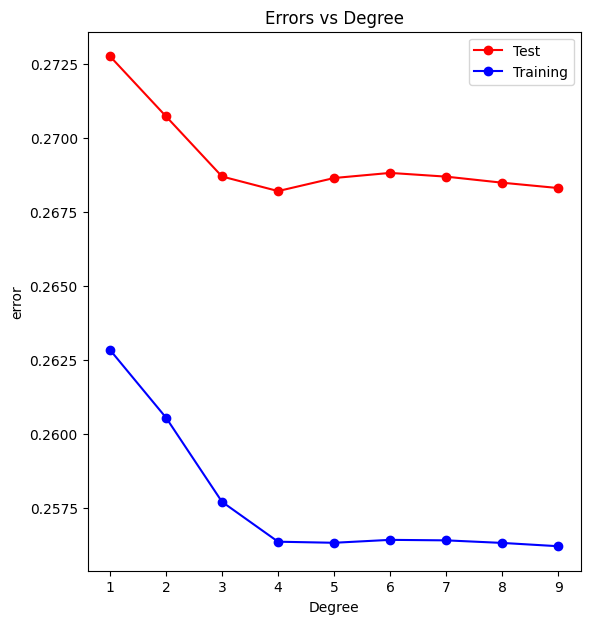

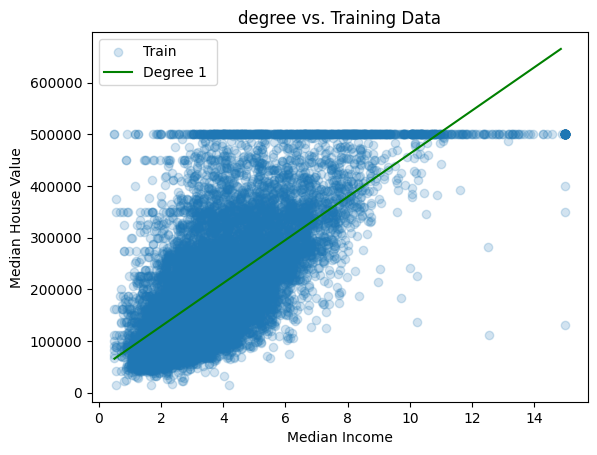

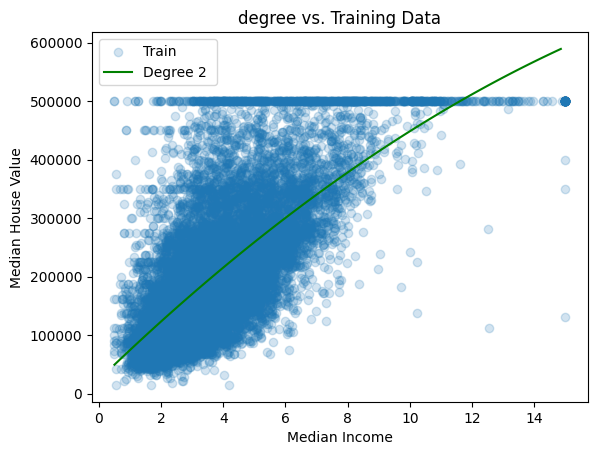

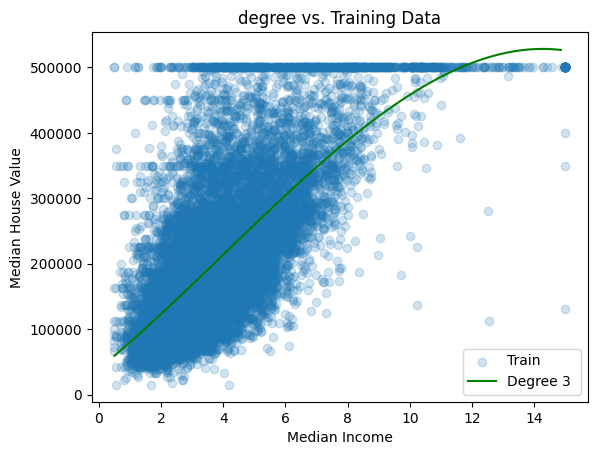

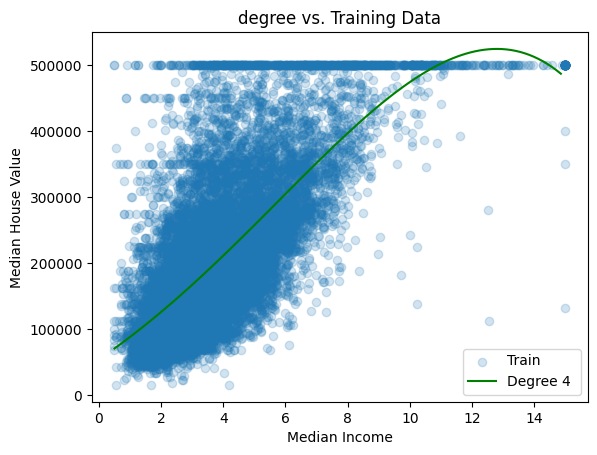

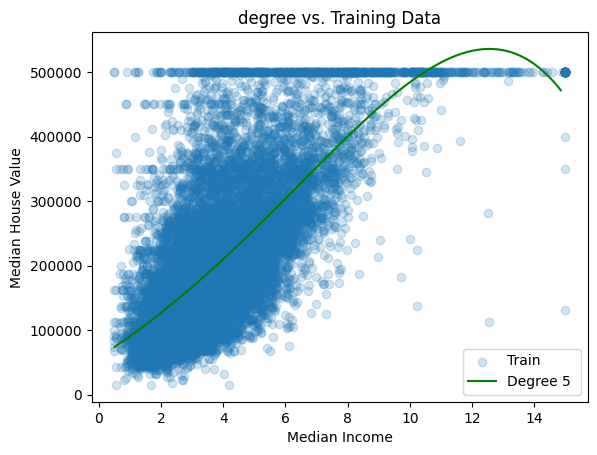

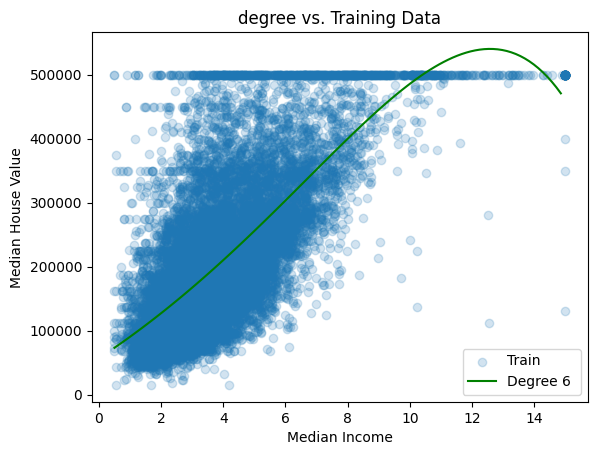

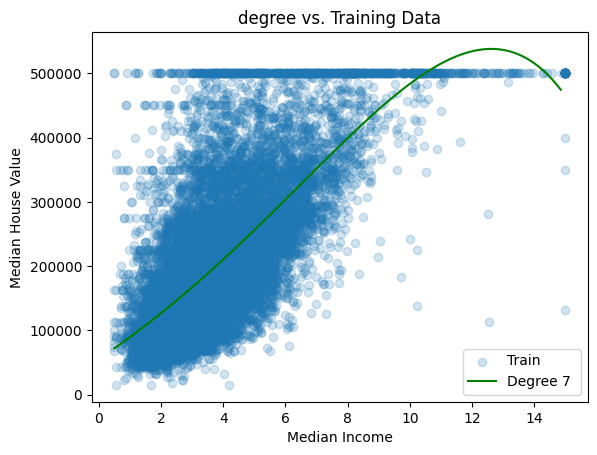

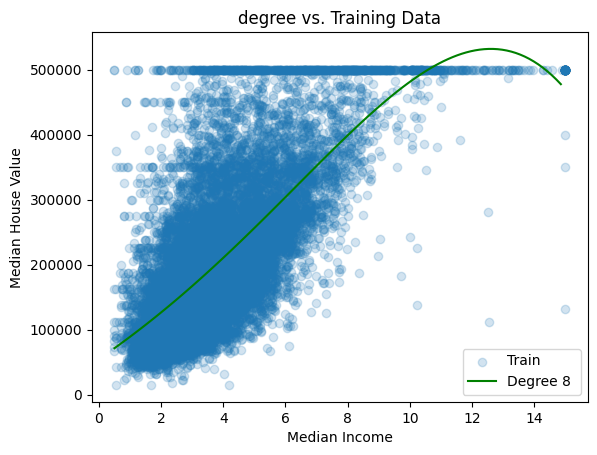

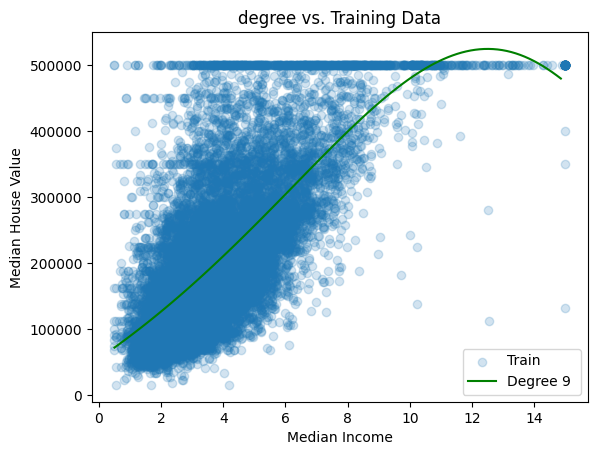

In [17]:
error_at_training=[]
error_at_test=[]
trained_model={}
# update for every gradient with degree i
for degree in range(1,10):
    poly_train=poly_features(X_train,degree)
    scaler_poly = StandardScaler()
    poly_train = scaler_poly.fit_transform(poly_train)
    Weight_degree=gradient_descent(poly_train,Y_train,LEARNING_RATE)
    trained_model[degree]={'weight':Weight_degree,'scaler':scaler_poly}
    train_error=Cost_fn(Weight_degree,poly_train,Y_train)
    error_at_training.append(train_error)    
    poly_test=poly_features(X_test,degree)
    poly_test = scaler_poly.transform(poly_test)
    test_error=Cost_fn(Weight_degree,poly_test,Y_test)
    error_at_test.append(test_error)

plot_error_graph(error_at_test,error_at_training)
plot_each_curve(X_train, Y_train, trained_model, scalerY)



In [18]:


# find lasso cost 
def cost_function_Lasso(Weight_degree,poly_mat,Y,lam):
    n=len(Y)
    preds=poly_mat.dot(Weight_degree)
    cost=((1/(2*n)*(np.sum(np.square(preds-Y)))))
    L1=(lam/n)*np.sum(np.abs(Weight_degree[1:]))
    tot_cost=cost+L1
    return tot_cost



In [19]:
# run lasso gradient descent
def lasso_gradient_descent(poly_X, Y,lam):
    m, n = poly_X.shape
    Weight = np.zeros((n, 1))
    for _ in range(EPOCHS):
        y_preds = poly_X.dot(Weight)
        errors = y_preds - Y
        gradient = (1/m) * (poly_X.T.dot(errors))
        req = (lam / m) * np.sign(Weight)
        req[0] = 0 
        Weight -= LEARNING_RATE * (gradient + req)
    return Weight



In [20]:
# create regularization gradient descent
def plot_reg_graph(lamb,error_at_training,error_at_test,degrees):
    plt.figure(figsize=(10,6))
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for idx, deg in enumerate(degrees):
        color = colors[idx % len(colors)]  # loop if more degrees than colors
        plt.plot(lamb, error_at_training[deg], 'o-', color=color, label=f'Train (deg={deg})')
        plt.plot(lamb, error_at_test[deg], 'x--', color=color, label=f'Test (deg={deg})')
        plt.title('Errors vs Degree')
    plt.xlabel('Lambda')
    plt.ylabel('Error')
    plt.legend()
    plt.xticks(lamb)
    plt.show()



In [21]:
# create ridge gradient descent

def ridge_gradient_descent(poly_X, Y,lam):
    m, n = poly_X.shape
    Weight = np.zeros((n, 1))
    for _ in range(EPOCHS):
        y_preds = poly_X.dot(Weight)
        errors = y_preds - Y
        gradient = (1/m) * (poly_X.T.dot(errors))
        req = (lam / m) *Weight
        req[0] = 0 
        Weight -= LEARNING_RATE * (gradient + req)
    return Weight



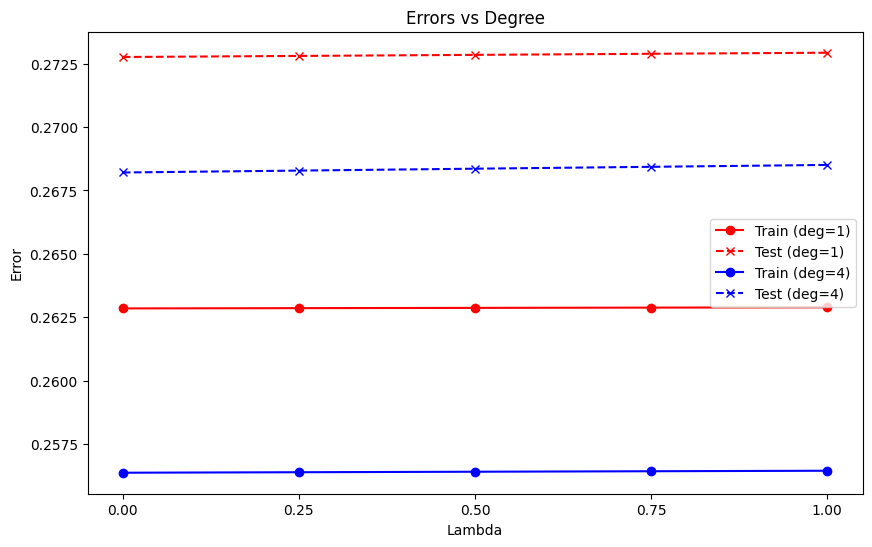

In [22]:
# as 1 has highest error and 4 has lowest error
degrees=[1,4]
training_errors = {deg: [] for deg in degrees}
test_errors = {deg: [] for deg in degrees}
# run lasso
lamd=[0,0.25,0.5,0.75,1]

for degree in degrees:
    poly_train_unsc= poly_features(X_train, degree)
    sc_poly = StandardScaler()
    poly_train_sc = sc_poly.fit_transform(poly_train_unsc)
    poly_test_unsc = poly_features(X_test, degree)
    poly_test_sc = sc_poly.transform(poly_test_unsc)
    for lam in lamd:
        Weight=lasso_gradient_descent(poly_train_sc, Y_train,lam)
        train_error = cost_function_Lasso(Weight, poly_train_sc, Y_train,lam)
        training_errors[degree].append(train_error)
        test_error = cost_function_Lasso(Weight, poly_test_sc, Y_test,lam)
        test_errors[degree].append(test_error)
    


plot_reg_graph(lamd,training_errors,test_errors,degrees)



In [23]:
# ridge regression cost fn
def cost_function_Ridge(Weight_degree,poly_mat,Y,lam):
    n=len(Y)
    preds=poly_mat.dot(Weight_degree)
    cost=((1/(2*n)*(np.sum(np.square(preds-Y)))))
    L2=(lam/(2*n))*np.sum(np.square(Weight_degree[1:]))
    tot_cost=cost+L2
    return tot_cost



Ridge Regression : 


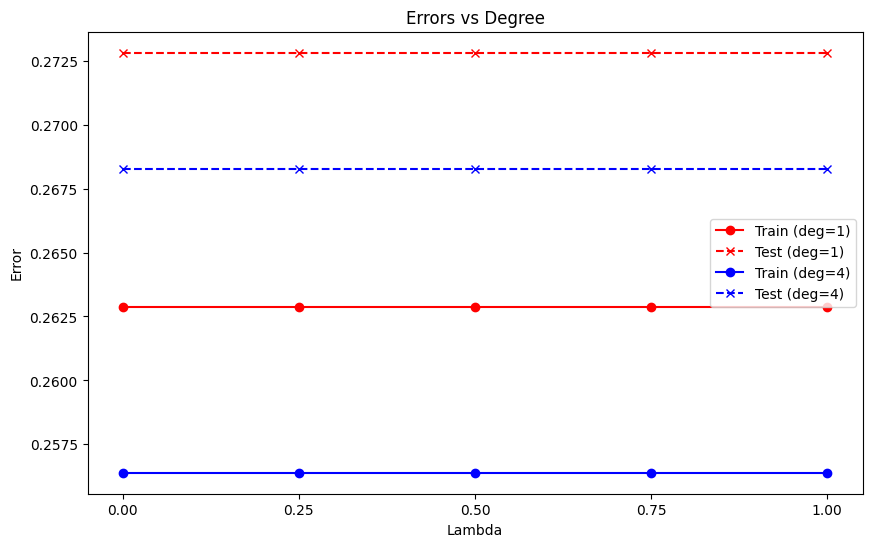

In [24]:

degrees=[1,4]
training_errors = {deg: [] for deg in degrees}
test_errors = {deg: [] for deg in degrees}
# as degree 1 hass lowest error and 4 has highest error
lamd=[0,0.25,0.5,0.75,1]
for degree in degrees:
    poly_train_unsc = poly_features(X_train, degree)
    scaler_poly = StandardScaler()
    poly_train_sc = scaler_poly.fit_transform(poly_train_unsc)
    poly_test_unsc = poly_features(X_test, degree)
    poly_test_sc = scaler_poly.transform(poly_test_unsc)

    for lamb in lamd:    
        Weight=ridge_gradient_descent(poly_train_sc, Y_train,lam)
        train_error = cost_function_Ridge(Weight, poly_train_sc, Y_train,lam)
        training_errors[degree].append(train_error)
        test_error = cost_function_Ridge(Weight, poly_test_sc, Y_test,lam)
        test_errors[degree].append(test_error)
print(f"Ridge Regression : ")

plot_reg_graph(lamd,training_errors,test_errors,degrees)

